In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import numpy as np
import os

carpeta = '../../data/canon/'

In [2]:
dataframes = {}
# Esto busca todos los archivos CSV en la carpeta 
for archivo in os.listdir(carpeta):
    if archivo.endswith('.csv') and os.path.isfile(os.path.join(carpeta, archivo)):
        # Carga el CSV en un DataFrame y agrega al diccionario
        df = pd.read_csv(os.path.join(carpeta, archivo))
        dataframes[archivo] = df

# Esto sirve para ver los nombres de los archivos
for nombre, df in dataframes.items():
    print(f'{nombre}:')
    print(df.head(), '\n')

Antiviral_canon.csv:
                                        sequence experimental_characteristics  \
0                                      AAAMSQVTN                    Mammalian   
1                   AACEVAKNLNESLIDLQELGKYEQYIKW                    Mammalian   
2                                      AAGAVVNDL                    Mammalian   
3                           AAHLIDALYAEFLGGRVLTT                    Mammalian   
4  AAHLIDALYAEFLGGRVLTTPVVHRALFYASAVLRQPFLAGVPSA                    Mammalian   

   half_life_seconds  length_sequence hl_category  
0            15840.0                9      Medium  
1            15840.0               28      Medium  
2            15840.0                9      Medium  
3            15840.0               20      Medium  
4            15840.0               45      Medium   

HLP_10_canon.csv:
     sequence experimental_characteristics  half_life_seconds  \
0  GSIGAASMEF          intestinal proteasa             2.7013   
1  IGAASMEFCF          intesti

In [3]:
for key, df in dataframes.items():
    num_filas = df.shape[0] 
    print(f"Dataset {key} : {num_filas} ")

Dataset Antiviral_canon.csv : 2181 
Dataset HLP_10_canon.csv : 189 
Dataset HLP_16_canon.csv : 186 
Dataset PEP_LIFE_canon.csv : 188 
Dataset Plifepred_canon.csv : 176 
Dataset Serum_canon.csv : 17 


In [4]:
summary_data = []
counts = {}
# Se crea una tabla con los valores estadísticos de cada dataset
for key, df in dataframes.items():
    summary = df.describe().T 
    summary['source'] = key  
    summary_data.append(summary) 
    counts[key]=df['hl_category'].value_counts()

df_summary = pd.concat(summary_data)
df_summary = df_summary.reset_index(drop=True)
counts=pd.DataFrame(counts)
counts.T

hl_category,High,Low,Medium
Antiviral_canon.csv,520.0,1027.0,634.0
HLP_10_canon.csv,NaN,189.0,NaN
HLP_16_canon.csv,NaN,186.0,NaN
PEP_LIFE_canon.csv,29.0,152.0,7.0
Plifepred_canon.csv,23.0,148.0,5.0
Serum_canon.csv,5.0,9.0,3.0


In [5]:
df_summary

,count,mean,std,min,25%,50%,75%,max,source
0,2181.0,26935.790922,53316.387932,2880.0000,7200.000000,10080.0000,15840.000000,360000.0000,Antiviral_canon.csv
1,2181.0,17.712059,8.001868,2.0000,13.000000,16.0000,20.000000,48.0000,Antiviral_canon.csv
2,189.0,1.269701,4.471332,0.0008,0.010300,0.0527,0.196900,40.1296,HLP_10_canon.csv
3,189.0,10.000000,0.000000,10.0000,10.000000,10.0000,10.000000,10.0000,HLP_10_canon.csv
4,186.0,0.138454,0.729387,0.0008,0.004925,0.0153,0.045825,6.4211,HLP_16_canon.csv
5,186.0,16.000000,0.000000,16.0000,16.000000,16.0000,16.000000,16.0000,HLP_16_canon.csv
6,188.0,12491.037766,31934.184219,10.0000,345.600000,764.4000,4842.000000,198000.0000,PEP_LIFE_canon.csv
7,188.0,23.457447,12.882990,2.0000,10.000000,27.0000,34.000000,48.0000,PEP_LIFE_canon.csv
8,176.0,8239.398295,22390.358458,22.0000,300.000000,652.5000,3538.500000,172800.0000,Plifepred_canon.csv
9,176.0,25.227273,11.588395,5.0000,16.000000,27.0000,34.250000,48.0000,Plifepred_canon.csv


In [6]:
#Se agrega la columna de la fuente de la secuencia
for key in dataframes:
    dataframes[key]['source'] = key

#Se concatenan todos los dataframes
df_concat=pd.concat(dataframes.values(), ignore_index=True)
#Se agrupan las secuencias y se cuentan cuantas veces aparece en cada fuente
df_check=df_concat.groupby(['sequence','source']).size().unstack(fill_value=0)

In [7]:
df_check

source,Antiviral_canon.csv,HLP_10_canon.csv,HLP_16_canon.csv,PEP_LIFE_canon.csv,Plifepred_canon.csv,Serum_canon.csv
sequence,,,,,,
AAAMSQVTN,1,0,0,0,0,0
AACEVAKNLNESLIDLQELGKYEQYIKW,1,0,0,0,0,0
AADQARELIN,0,1,0,0,0,0
AADQARELINSWVESQ,0,0,1,0,0,0
AAGAVVNDL,1,0,0,0,0,0
...,...,...,...,...,...,...
YTSLIHSLIEEWQNQQEKNEQELLELDKWASLWNWF,3,0,0,0,0,0
YTSLIHSLIEEYQNQQEKNEQELLELDKWASLWNWF,3,0,0,0,0,0
YVREHGVPIHADKYFEQVLK,3,0,0,0,0,0


In [8]:
df_concat.columns

Index(['sequence', 'experimental_characteristics', 'half_life_seconds',
       'length_sequence', 'hl_category', 'source'],
      dtype='object')

In [9]:
hl_count_cat=df_concat[df_concat['source']=='Serum']
grouped=hl_count_cat.groupby(['experimental_characteristics', 'hl_category']).size()
grouped=pd.DataFrame(grouped)

In [10]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [11]:
display(grouped)

,,0
experimental_characteristics,hl_category,


In [12]:
df_concat.value_counts('source')

source
Antiviral_canon.csv    2181
HLP_10_canon.csv        189
PEP_LIFE_canon.csv      188
HLP_16_canon.csv        186
Plifepred_canon.csv     176
Serum_canon.csv          17
Name: count, dtype: int64

In [13]:
df_concat.describe()

,half_life_seconds,length_sequence
count,2937.000000,2937.000000
mean,21405.567220,17.959482
std,48018.959477,8.722801
min,0.000800,2.000000
25%,3600.000000,12.000000
50%,7200.000000,16.000000
75%,10800.000000,20.000000
max,360000.000000,48.000000


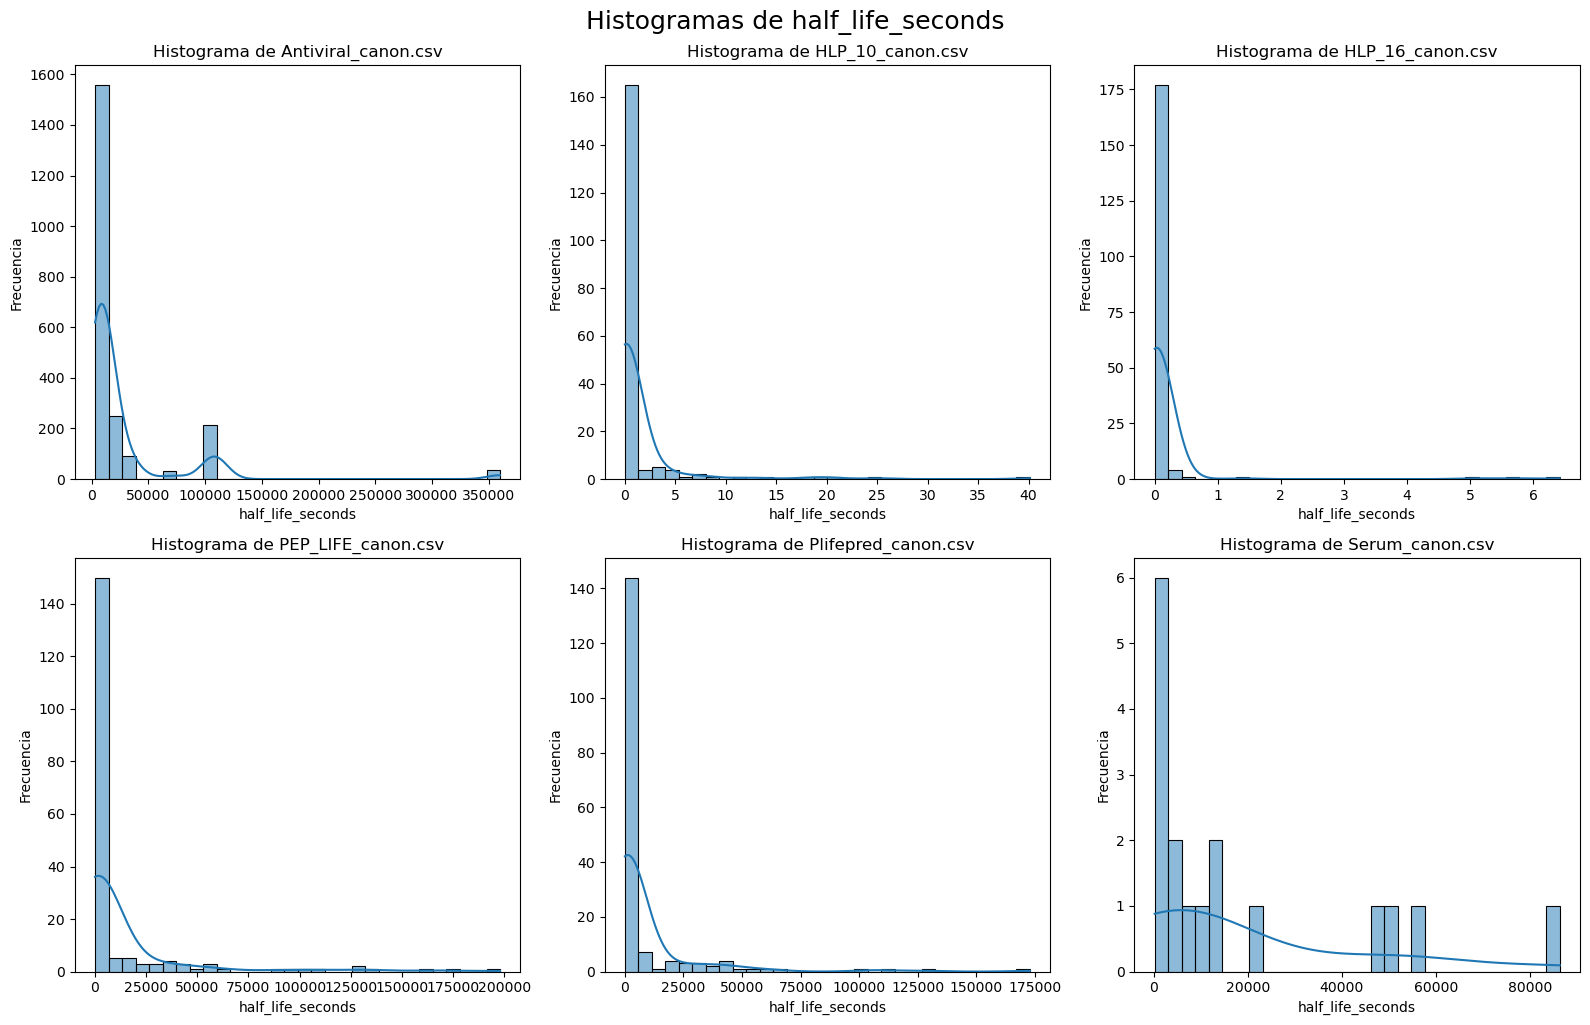

In [14]:
# Extraer la columna `half_life_seconds` solo si existe y no está vacía
columns_to_plot = {
    name: df["half_life_seconds"] 
    for name, df in dataframes.items() 
    if "half_life_seconds" in df.columns and not df["half_life_seconds"].dropna().empty
}

# Configuración de subplots: 2 filas arriba, 3 abajo (en total 2x3 = 6 espacios)
n_cols = 3
n_rows = 2

# Crear figura para los histogramas
plt.figure(figsize=(16, 10))
for i, (name, column) in enumerate(columns_to_plot.items(), 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(column, kde=True, bins=30)
    plt.title(f"Histograma de {name}")
    plt.xlabel("half_life_seconds")
    plt.ylabel("Frecuencia")
plt.tight_layout()
plt.suptitle("Histogramas de half_life_seconds", fontsize=18, y=1.02)
plt.savefig("../../img/datasets/hist_datasets.png")
plt.show()

In [15]:
cat_hl = {
    "Low": {},
    "Medium": {},
    "High": {}
}

In [16]:
Low_cat=df_concat[df_concat['hl_category']=='Low']
Medium_cat=df_concat[df_concat['hl_category']=='Medium']
High_cat=df_concat[df_concat['hl_category']=='High']

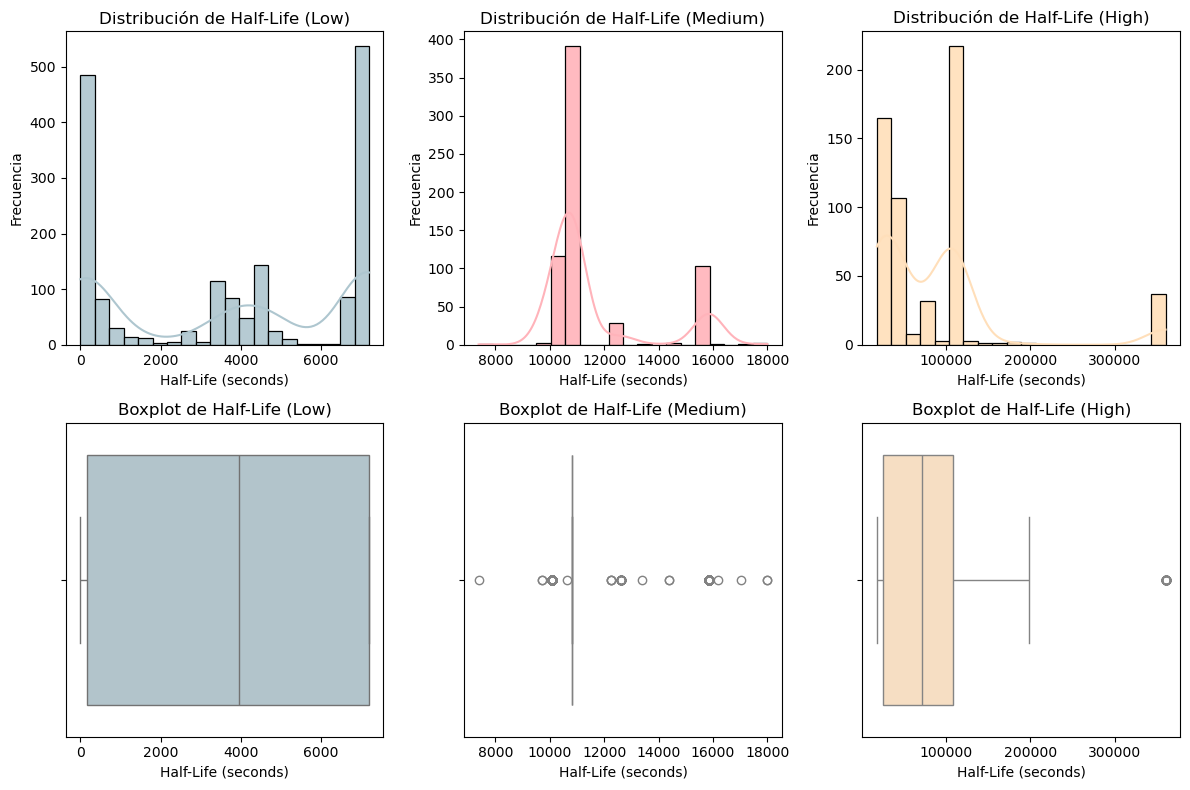

In [17]:
pastel_colors = {'Low': '#AEC6CF', 'Medium': '#FFB3BA', 'High': '#FFDFBA'}

fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # 2 filas (para distribuciones y boxplots) y 3 columnas

# Categorías y colores para iterar
categories = {'Low': Low_cat, 'Medium': Medium_cat, 'High': High_cat}
colors = pastel_colors  # Usamos los colores pastel generados

# Iterar por las categorías y sus posiciones en los subgráficos
for i, (cat, data) in enumerate(categories.items()):
    # Gráfico de distribución
    sns.histplot(data['half_life_seconds'], kde=True, bins=20, color=colors[cat], ax=axes[0, i], alpha=0.9)
    axes[0, i].set_title(f'Distribución de Half-Life ({cat})')
    axes[0, i].set_xlabel('Half-Life (seconds)')
    axes[0, i].set_ylabel('Frecuencia')

    # Gráfico de boxplot
    sns.boxplot(x=data['half_life_seconds'], color=colors[cat], ax=axes[1, i])
    axes[1, i].set_title(f'Boxplot de Half-Life ({cat})')
    axes[1, i].set_xlabel('Half-Life (seconds)')

# Ajustar el diseño para que no se superpongan los gráficos
plt.tight_layout()
plt.savefig('../../img/datasets/histbox_datasets_cat.png')
plt.show()

In [18]:
for source_name, df in dataframes.items():
    # Verifica que el dataframe no esté vacío y contiene las columnas necesarias
    if not df.empty and 'hl_category' in df.columns and 'source' in df.columns:
        for category in cat_hl.keys():
            # Filtrar el dataframe
            filtered_df = df[(df['hl_category'] == category) & (df['source'] == source_name)]
            # Guardar el dataframe filtrado en el diccionario
            cat_hl[category][source_name] = filtered_df

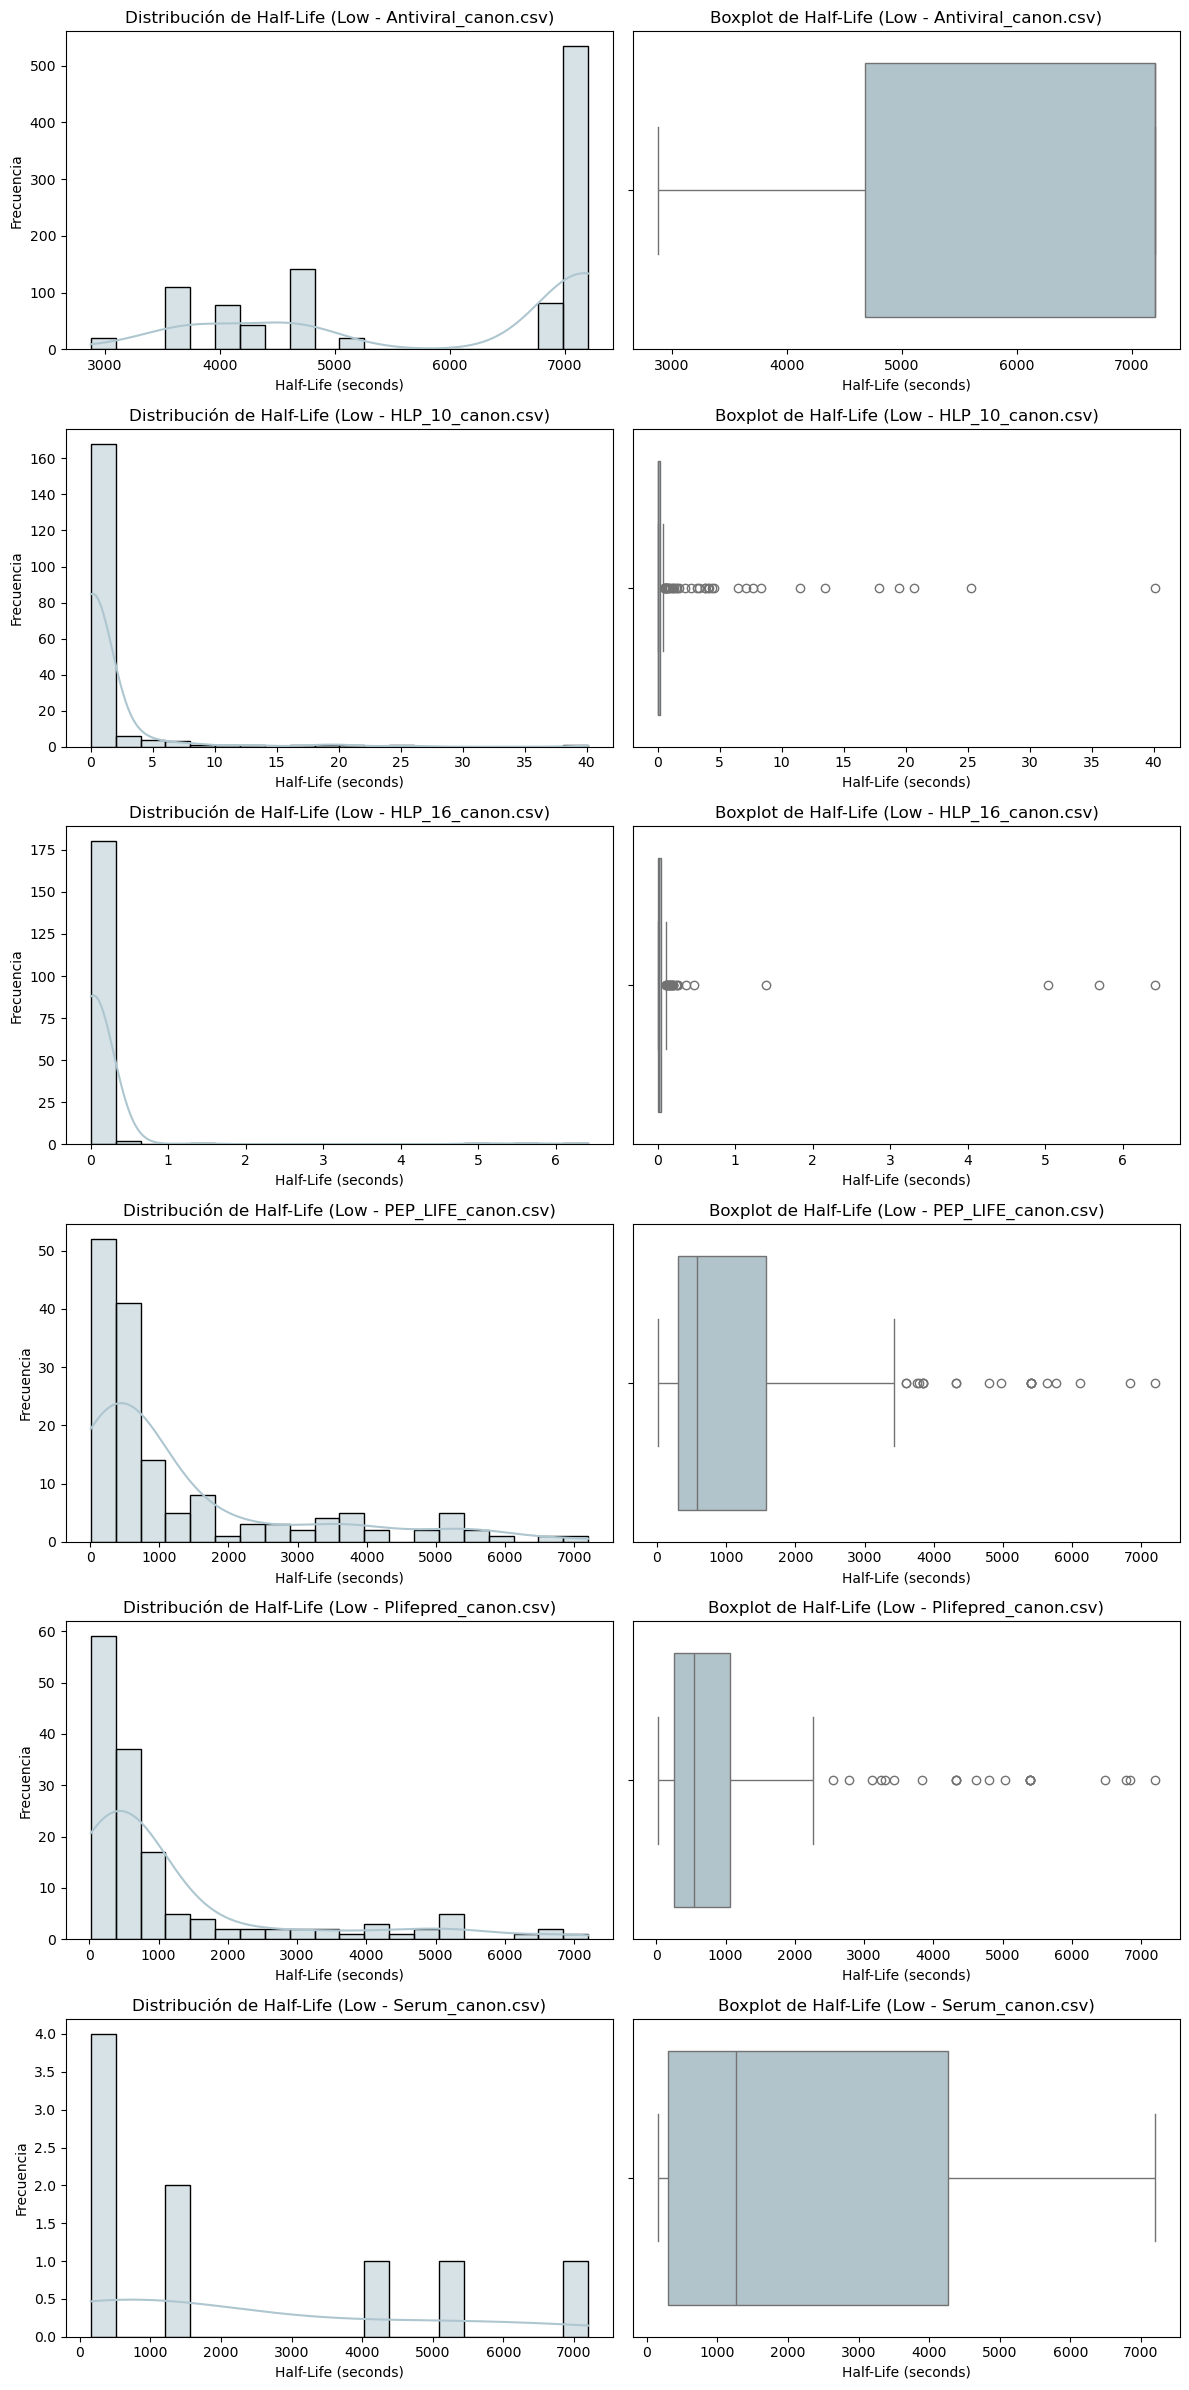

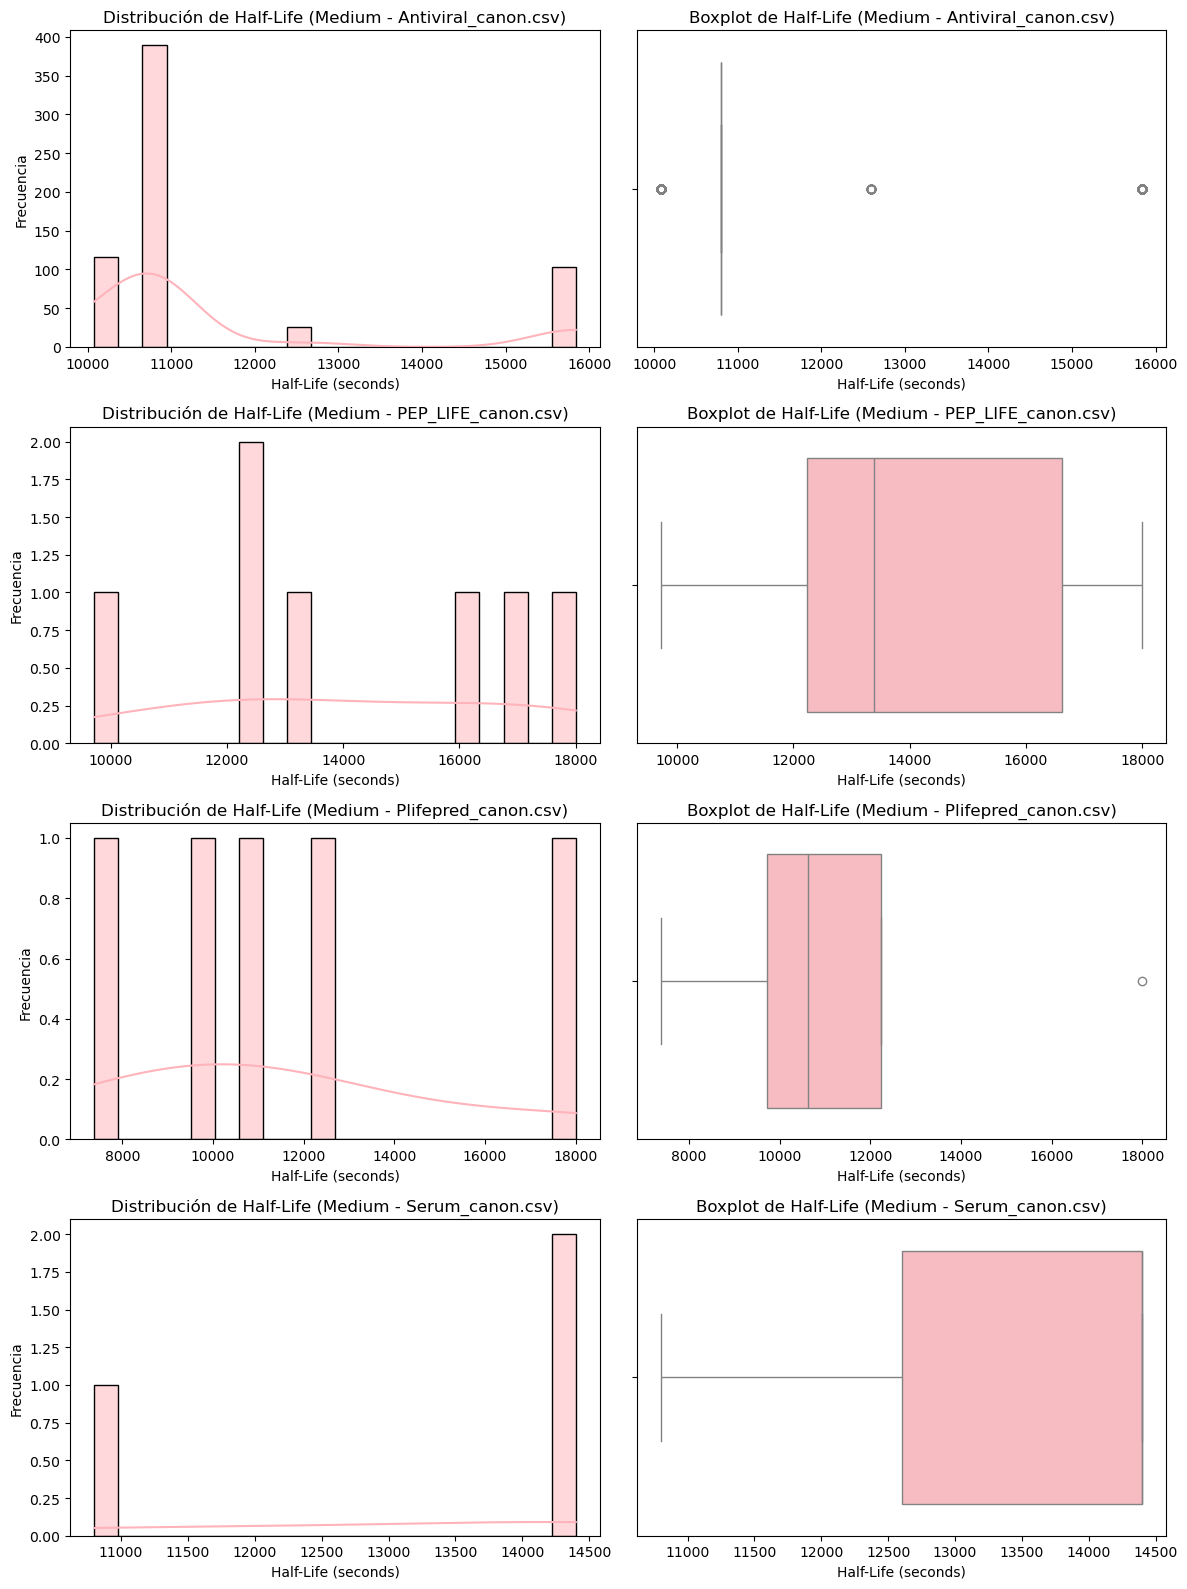

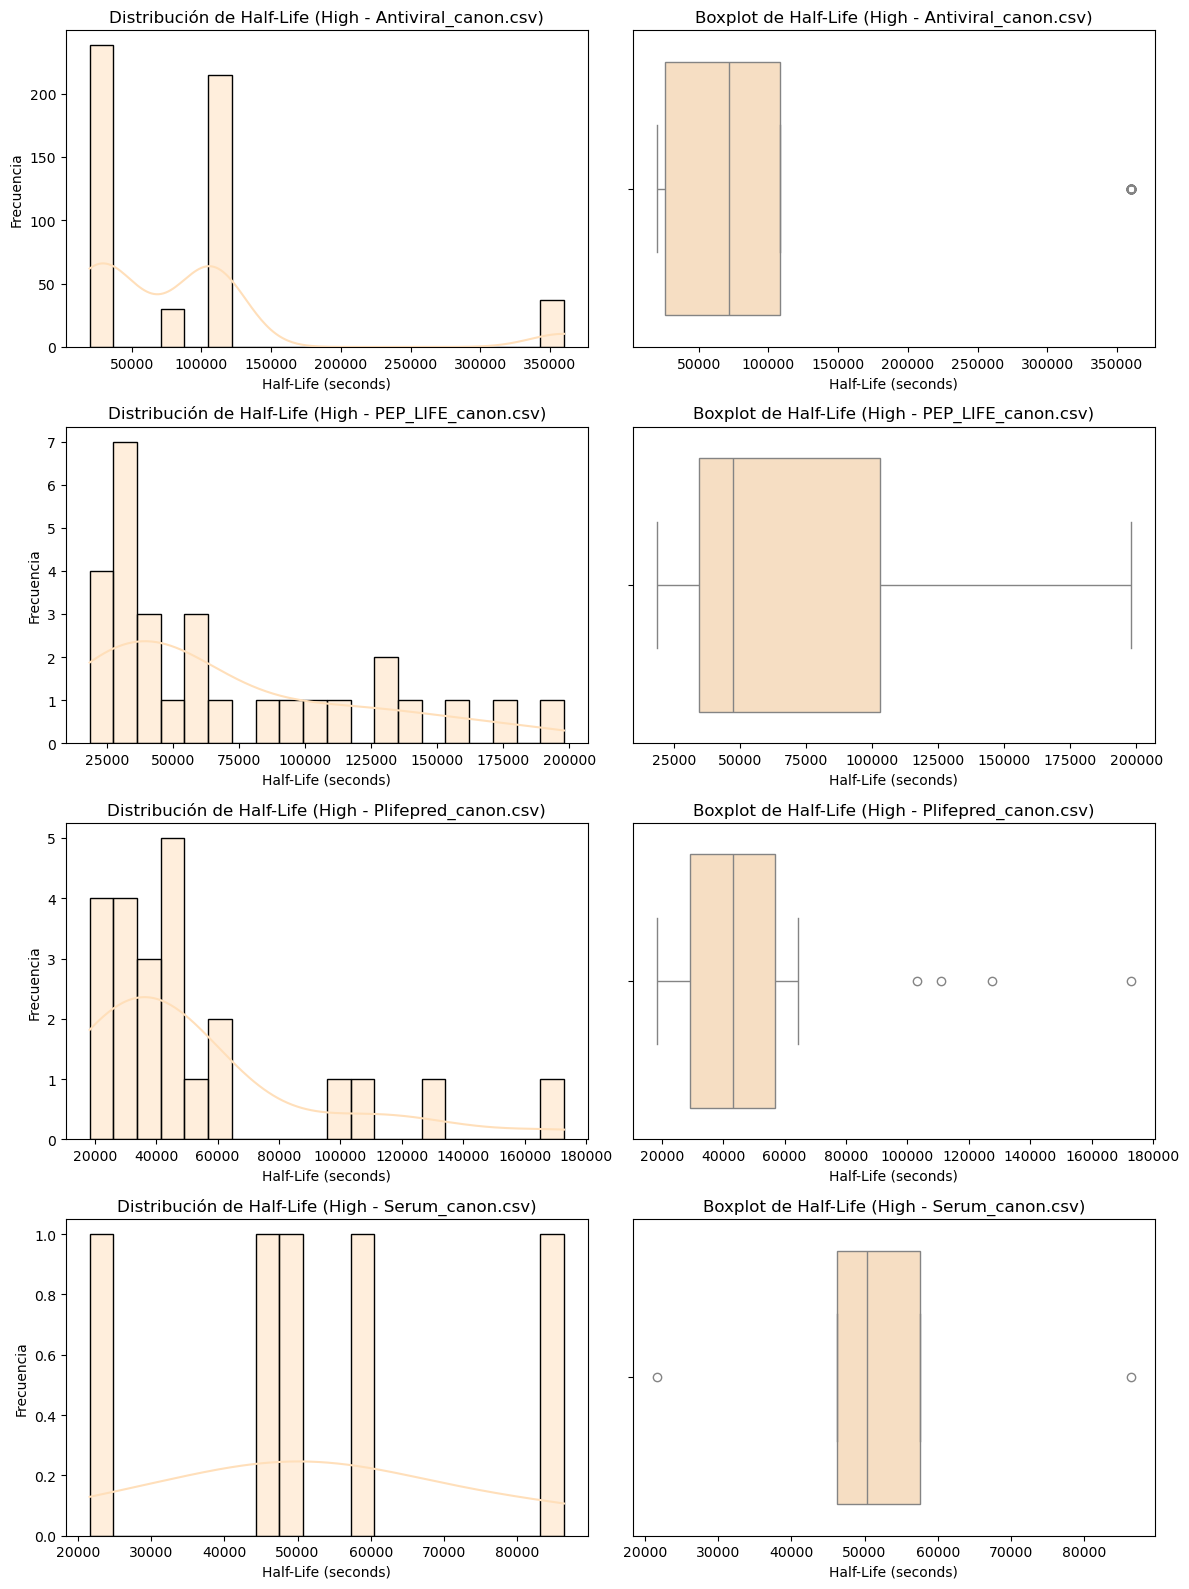

In [19]:
for category, sources in cat_hl.items():
    # Filtrar las fuentes con datos disponibles
    sources_with_data = {source_name: df for source_name, df in sources.items() if not df.empty and 'half_life_seconds' in df.columns}
    
    if len(sources_with_data) == 0:
        # Si no hay fuentes con datos, continuar con la siguiente categoría
        continue

    # Crear una figura para cada categoría, ajustando el número de filas según las fuentes con datos
    fig, axes = plt.subplots(len(sources_with_data), 2, figsize=(12, 4 * len(sources_with_data)))

    # Si solo hay una fuente, ajustar el formato de `axes`
    if len(sources_with_data) == 1:
        axes = [axes]

    # Iterar por cada fuente con datos en la categoría
    for idx, (source_name, df) in enumerate(sources_with_data.items()):
        # Gráfico de distribución
        sns.histplot(
            df['half_life_seconds'], 
            kde=True, 
            bins=20, 
            color=colors[category], 
            ax=axes[idx][0]
        )
        axes[idx][0].set_title(f'Distribución de Half-Life ({category} - {source_name})')
        axes[idx][0].set_xlabel('Half-Life (seconds)')
        axes[idx][0].set_ylabel('Frecuencia')

        # Gráfico de boxplot
        sns.boxplot(
            x=df['half_life_seconds'], 
            color=colors[category], 
            ax=axes[idx][1]
        )
        axes[idx][1].set_title(f'Boxplot de Half-Life ({category} - {source_name})')
        axes[idx][1].set_xlabel('Half-Life (seconds)')

    # Ajustar el diseño para cada categoría
    plt.tight_layout()

    # Guardar el gráfico por categoría
    plt.savefig(f'../../img/datasets/{category}_distribution_boxplots.png')
    plt.show()